In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
def re_scale(input_np, input_min=1, input_max = 4):
    return np.interp(input_np, (input_min,input_max), (+100, -100))

In [3]:
def plot_t2_vs_t1(model='GPT4',ab='a'):
    cmap = sns.cm.rocket_r
    sns.set(font_scale=1.3)

    data_t1 = pd.read_csv('../csv/people_tier_1_2ab_3_4_report - tier1_heatmap_df.csv')
    df1 =  pd.DataFrame(data =re_scale(data_t1[model]), columns=['Sensitivity'], index=data_t1['Information Type'].to_list())
    ###################
    data_t2a = pd.read_csv(f'../csv/people_tier_1_2ab_3_4_report - tier2.{ab}_heatmap_df.csv').drop(columns = ['Story'])
    data_t2a_sec_actor = data_t2a.groupby(['Information Type','Actor']).mean().reset_index()

    data_t2a_sec_actor 
    #print("HERE")

    t2a_actor_hmap = data_t2a_sec_actor.pivot(index='Information Type', columns='Actor')[model]
    df_actor = t2a_actor_hmap

    data_t2a_sec_use = data_t2a.groupby(['Information Type','Use']).mean().reset_index()


    t2a_use_hmap = data_t2a_sec_use.pivot(index='Information Type', columns='Use')[model]
    df_use = t2a_use_hmap

    #################
    order_secret = ['Politics','SSN','Friends','Location','Health','Religion','Shopping','Mean']
    use_order  = ['non.', 'com.','Mean']
    actor_order = ['Dr','Insurance','Online','Work','Library','Education','Store']

    ################

    df_actor.loc['Mean'] = df_actor.mean()
    df_use.loc['Mean'] = df_use.mean()
    df1.loc['Mean'] = df1.mean()

    #df_actor['Mean'] = df_actor.mean(axis=1)
    df_use['Mean'] = df_use.mean(axis=1)

    ################
    df_actor =df_actor.reset_index().set_index('Information Type')
    df_actor = df_actor.loc[order_secret]
    df_actor = df_actor.reindex(columns=actor_order)
    
    df_use =df_use.reset_index().set_index('Information Type')
    df_use = df_use.loc[order_secret]
    df_use = df_use.reindex(columns=use_order) 

    #df_use =df_use.reset_index().set_index('Information Type')
    df1 = df1.loc[order_secret]

    ################
    #left=0.1,bottom=0.1,right=0.9, top=0.9,
    vmin = -100
    vmax = 100

    sns.set(font_scale=1.1)



    fig, ax = plt.subplots(ncols=3, sharey=True,gridspec_kw=dict(width_ratios=[0.6,3.6,1.7])) #0.8,3.8,4.6
    


    sns_actor = sns.heatmap(df_actor, annot=True, yticklabels=False, cbar=False,  ax=ax[1],vmin=vmin, vmax=vmax,fmt=".0f",cmap=cmap)
    sns_use = sns.heatmap(df_use ,annot=True,  ax=ax[2],vmin=vmin, yticklabels=False, vmax=vmax,fmt=".0f", cbar=True,cmap=cmap)


    plt.rc('figure', figsize=(7, 5))

    if model == 'GPT4' or model == 'Human':
        #ax[0].set_yticklabels(labels=data_t1['Information Type'].to_list())
        sns_g1 = sns.heatmap(df1, yticklabels=True, annot=True, cbar=False, ax=ax[0],vmin=vmin, vmax=vmax,fmt=".0f",cmap=cmap)

        ax[0].set_ylabel('Information Type')
    else:
        sns_g1 = sns.heatmap(df1, yticklabels=False, annot=True, cbar=False, ax=ax[0],vmin=vmin, vmax=vmax,fmt=".0f",cmap=cmap)



    ax[0].set_xlabel('Tier 1')

    ax[1].set_ylabel('')
    ax[2].set_ylabel('')

    # fig.subplots_adjust(right=0.6)
    # cbar_ax = fig.add_axes([1.1, 0.15, 0.05, .77])
    # fig.colorbar(ax[1], cax=cbar_ax)

    #plt.tight_layout()


    plt.subplots_adjust( wspace=0.1,
                        hspace=0.0)
    #ax[1].xlabel(f'Breakdown of results for Tier 2.{ab} -- {model}')
    plt.savefig(f'../pdf/heatmap_1_2{ab}_{model}.pdf', transparent=False, bbox_inches='tight')
    plt.show()

/tmp/ipykernel_3004349/2127953932.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_t2a_sec_actor = data_t2a.groupby(['Information Type','Actor']).mean().reset_index()
/tmp/ipykernel_3004349/2127953932.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_t2a_sec_use = data_t2a.groupby(['Information Type','Use']).mean().reset_index()


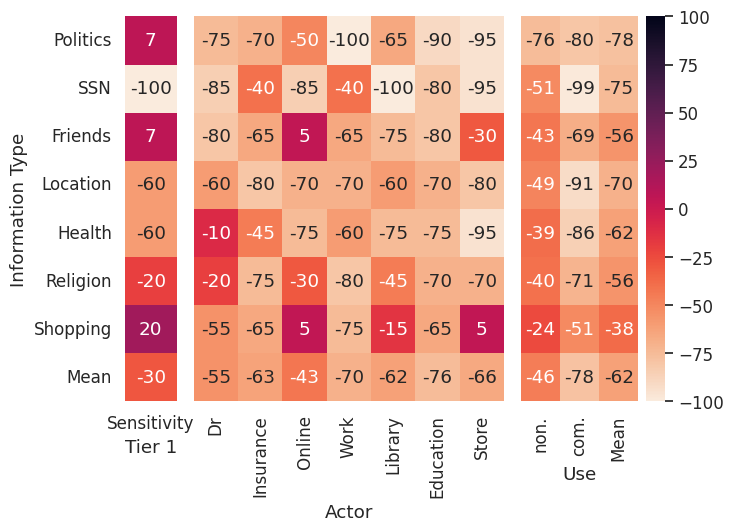

/tmp/ipykernel_3004349/2127953932.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_t2a_sec_actor = data_t2a.groupby(['Information Type','Actor']).mean().reset_index()
/tmp/ipykernel_3004349/2127953932.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_t2a_sec_use = data_t2a.groupby(['Information Type','Use']).mean().reset_index()


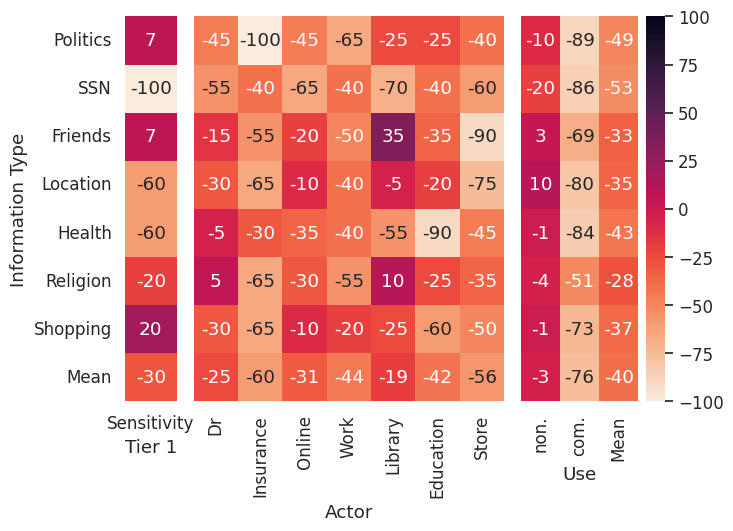

In [6]:
for model in ['Human']: #['GPT4','ChatGPT','Davinci','Llama2 Chat','Llama2','Flan UL2']:
    for ab in  ['a', 'b']:
        plot_t2_vs_t1(model=model,ab=ab)


# for body of paper

In [52]:
def plot_t2_vs_t1(model='GPT4',ab='a'):
    cmap = sns.cm.rocket_r
    sns.set(font_scale=1.3)

    data_t1 = pd.read_csv('../csv/people_tier_1_2ab_3_4_report - tier1_heatmap_df.csv')
    df1 =  pd.DataFrame(data =re_scale(data_t1[model]), columns=['Sensitivity'], index=data_t1['Information Type'].to_list())
    ###################
    data_t2a = pd.read_csv(f'../csv/people_tier_1_2ab_3_4_report - tier2.{ab}_heatmap_df.csv').drop(columns = ['Story'])
    data_t2a_sec_actor = data_t2a.groupby(['Information Type','Actor']).mean().reset_index()

    data_t2a_sec_actor 
    #print("HERE")

    t2a_actor_hmap = data_t2a_sec_actor.pivot(index='Information Type', columns='Actor')[model]
    df_actor = t2a_actor_hmap

    data_t2a_sec_use = data_t2a.groupby(['Information Type','Use']).mean().reset_index()


    t2a_use_hmap = data_t2a_sec_use.pivot(index='Information Type', columns='Use')[model]
    df_use = t2a_use_hmap

    #################
    order_secret = ['Politics','SSN','Friends','Location','Health','Religion','Shopping','Mean']
    use_order  = ['non.', 'com.','Mean']
    actor_order = ['Dr','Insurance','Online','Work','Library','Education','Store']

    ################

    df_actor.loc['Mean'] = df_actor.mean()
    df_use.loc['Mean'] = df_use.mean()
    df1.loc['Mean'] = df1.mean()

    #df_actor['Mean'] = df_actor.mean(axis=1)
    df_use['Mean'] = df_use.mean(axis=1)

    ################
    df_actor =df_actor.reset_index().set_index('Information Type')
    df_actor = df_actor.loc[order_secret]
    df_actor = df_actor.reindex(columns=actor_order)
    
    df_use =df_use.reset_index().set_index('Information Type')
    df_use = df_use.loc[order_secret]
    df_use = df_use.reindex(columns=use_order) 

    #df_use =df_use.reset_index().set_index('Information Type')
    df1 = df1.loc[order_secret]

    ################
    #left=0.1,bottom=0.1,right=0.9, top=0.9,
    vmin = -100
    vmax = 100

    sns.set(font_scale=1.1)


    if ab == 'a':
        fig, ax = plt.subplots(ncols=3, sharey=True,gridspec_kw=dict(width_ratios=[0.6,3.6,1.7])) #0.8,3.8,4.6
        sns_actor = sns.heatmap(df_actor, annot=True, yticklabels=False, cbar=False,  ax=ax[1],vmin=vmin, vmax=vmax,fmt=".0f",cmap=cmap)
        sns_use = sns.heatmap(df_use ,annot=True,  ax=ax[2],vmin=vmin, yticklabels=False, vmax=vmax,fmt=".0f", cbar=False,cmap=cmap)


    else:
        fig, ax = plt.subplots(ncols=2, sharey=True,gridspec_kw=dict(width_ratios=[3.6,1.7])) #0.8,3.8,4.6
        sns_actor = sns.heatmap(df_actor, annot=True, yticklabels=False, cbar=False,  ax=ax[0],vmin=vmin, vmax=vmax,fmt=".0f",cmap=cmap)
        sns_use = sns.heatmap(df_use ,annot=True,  ax=ax[1],vmin=vmin, yticklabels=False, vmax=vmax,fmt=".0f", cbar=True,cmap=cmap)



    plt.rc('figure', figsize=(7, 5))

    if model == 'GPT4' and ab == 'a':
        #ax[0].set_yticklabels(labels=data_t1['Information Type'].to_list())
        sns_g1 = sns.heatmap(df1, yticklabels=True, annot=True, cbar=False, ax=ax[0],vmin=vmin, vmax=vmax,fmt=".0f",cmap=cmap)

        ax[0].set_ylabel('Information Type')
    # else:
    #     sns_g1 = sns.heatmap(df1, yticklabels=False, annot=True, cbar=False, ax=ax[0],vmin=vmin, vmax=vmax,fmt=".0f",cmap=cmap)


    if ab == 'a':
        ax[0].set_xlabel('Tier 1')

    ax[1].set_ylabel('')
    if ab == 'a':
        ax[2].set_ylabel('')

    # fig.subplots_adjust(right=0.6)
    # cbar_ax = fig.add_axes([1.1, 0.15, 0.05, .77])
    # fig.colorbar(ax[1], cax=cbar_ax)

    #plt.tight_layout()


    plt.subplots_adjust( wspace=0.1,
                        hspace=0.0)
    #ax[1].xlabel(f'Breakdown of results for Tier 2.{ab} -- {model}')
    plt.savefig(f'../pdf/heatmap_1_2{ab}_{model}.pdf', transparent=False, bbox_inches='tight')
    plt.show()

/tmp/ipykernel_2107190/227621151.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_t2a_sec_actor = data_t2a.groupby(['Information Type','Actor']).mean().reset_index()
/tmp/ipykernel_2107190/227621151.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_t2a_sec_use = data_t2a.groupby(['Information Type','Use']).mean().reset_index()


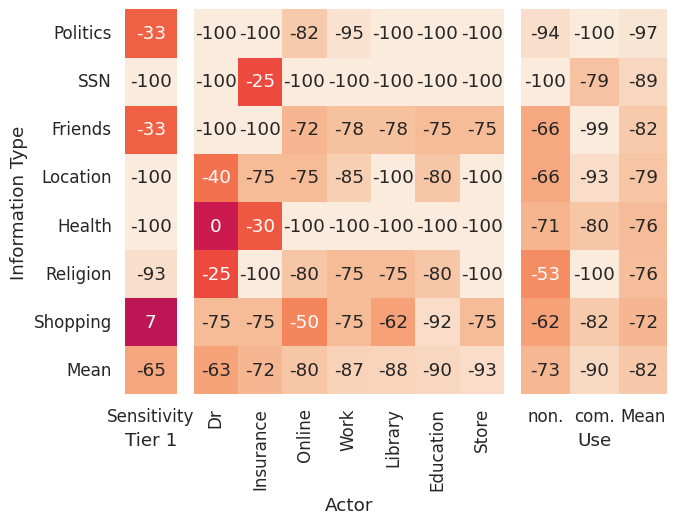

/tmp/ipykernel_2107190/227621151.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_t2a_sec_actor = data_t2a.groupby(['Information Type','Actor']).mean().reset_index()
/tmp/ipykernel_2107190/227621151.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_t2a_sec_use = data_t2a.groupby(['Information Type','Use']).mean().reset_index()


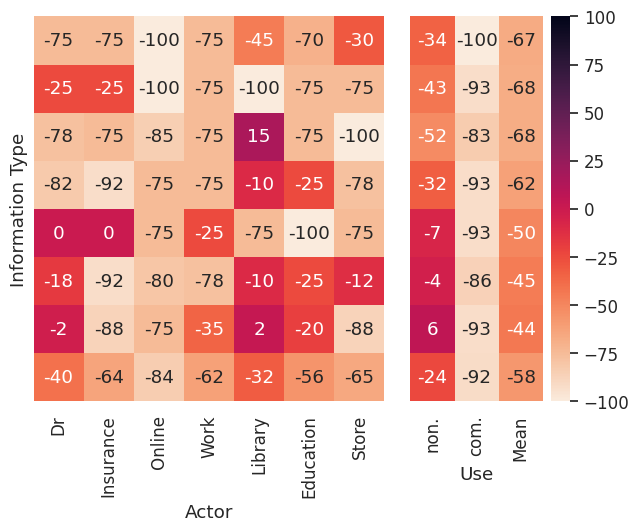

In [53]:
plot_t2_vs_t1(model='GPT4',ab='a')
plot_t2_vs_t1(model='GPT4',ab='b')
